In [41]:
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt

In [42]:
from sympy import Matrix
from sympy.printing.latex import latex

In [43]:
def transformation_matrix(N):
    matrix = np.zeros((N, N))
    # Fill ones in the subdiagonals
    np.fill_diagonal(matrix[1:], 1)  
    np.fill_diagonal(matrix[2:], 1)  
    # Fill ones in the superdiagonal
    np.fill_diagonal(matrix[:, 1:], 1)  
    np.fill_diagonal(matrix[:, 2:], 1)  

    # Connect the first and last rows for the periodic boundary conditions
    np.fill_diagonal(matrix[:, -1:], 1)
    np.fill_diagonal(matrix[:, -2:], 1)

    np.fill_diagonal(matrix[-1:, :], 1)
    np.fill_diagonal(matrix[-2:, :], 1)


    return matrix/4 # Normalize the markov matrix 

def save_mat_to_latex(M, filename):
    sym_M = Matrix(M)
    # Get the LaTeX representation of the matrix
    latex_code = latex(sym_M)

    # Write LaTeX code to a .tex file
    file_path = 'data/raw/transformation_mat/'+filename
    print(file_path)
    with open(file_path, 'w') as file:
        file.write(latex_code)


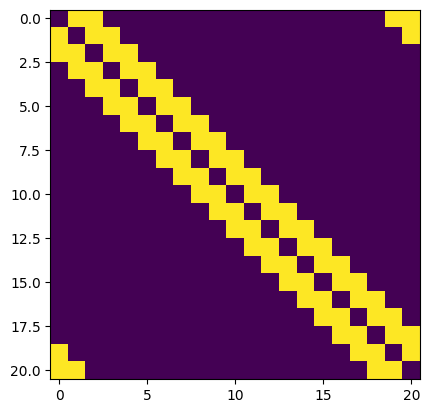

In [44]:
dim = 21 # Dimension of the matrix
N = 51 
T = transformation_matrix(dim)
plt.imshow(T)

data/raw/transformation_mat/matrix_21x21.tex
3.637978807091714e-12


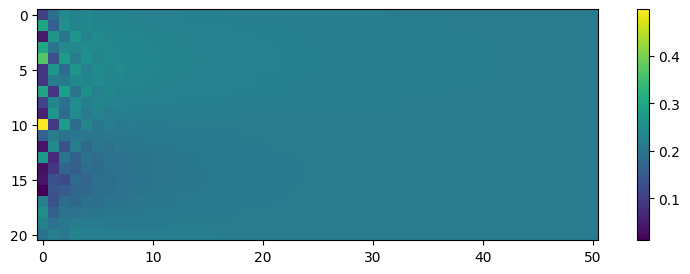

In [45]:


m = T.shape[0]
n = T.shape[1]
save_mat_to_latex(T, 'matrix_'+str(m)+'x'+str(n)+'.tex')
print(np.linalg.det(T))
t = np.linspace(0,N-1,N) #timesteps


V0 = np.random.rand(dim)
sol = np.zeros((dim,N))
sol[:,0] = V0/np.linalg.norm(V0)
sol[:, 0] /= np.linalg.norm(sol[:, 0])

for i in range(1, N):
    sol[:, i] = np.dot(T, sol[:, i-1])
    sol[:, i] /= np.linalg.norm(sol[:, i-1])

plt.figure(figsize=(10,3))
plt.imshow(sol)
plt.colorbar()


In [46]:
print('K for the simply connected matrix:', np.linalg.cond(T))

K for the simply connected matrix: 60.13587019314688


In [47]:
# Function to perform power iteration to find the largest eigenvalue and the corresponding eigenvector
def power_iteration(A, x, max_iter=10000):
    tol = 1e-14

    eigenval_prev = 0
    
    for _ in range(max_iter): 
        # Compute the updated approximation for the eigenvector 
        x = A @ x / np.linalg.norm(A @ x) 
        # Compute the updated approximation for the largest eigenvalue 
        eigenval = (x.T @ A @ x) / (x.T @ x) 
        # Check if the approximations have converged 
        if np.abs(eigenval - eigenval_prev) < tol: 
            break
        # Store the current approximation for the largest eigenvalue 
        eigenval_prev = eigenval 
    
    return eigenval, x 

def inverse_power_iteration(A, x, max_iter=10000):
    tol = 1e-14

    A_inv = sp.linalg.inv(A)
    
    eigenval_prev = 0
    
    for _ in range(max_iter): 
        # Compute the updated approximation for the eigenvector 
        x = A_inv @ x / np.linalg.norm(A_inv @ x) 
        # Compute the updated approximation for the largest eigenvalue 
        eigenval = (x.T @ A @ x) / (x.T @ x) 
        # Check if the approximations have converged 
        if np.abs(eigenval - eigenval_prev) < tol: 
            break
        # Store the current approximation for the largest eigenvalue 
        eigenval_prev = eigenval 
    
    return eigenval, x 

x = np.random.rand(T.shape[1])

# Perform iterations
largest_eigenvalue, largest_eigenvector = power_iteration(T,x)
smallest_eigenvalue, smallest_eigenvector = inverse_power_iteration(T,x)

# Verification using linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(T)
eigenvectors = eigenvectors.T
# Display results
print("Iterative Method Results:")
print("Largest Eigenvalue:", largest_eigenvalue)
print("Largest Eigenvector:", largest_eigenvector)
print("Smallest Eigenvalue:", smallest_eigenvalue)
print("Smallest Eigenvector:", smallest_eigenvector)

print("\nVerification using np.linalg.eig:")
print("Largest Eigenvalue:", eigenvalues[np.where(eigenvalues == np.max(eigenvalues))])
print("Largest Eigenvector:", eigenvectors[np.where(eigenvalues == np.max(eigenvalues))])
print("Smallest Eigenvalue:", eigenvalues[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))])
print("Smallest Eigenvector:", eigenvectors[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))])

print("\nError eps_max = ", abs((largest_eigenvalue-eigenvalues[np.where(eigenvalues == np.max(eigenvalues))])/eigenvalues[np.where(eigenvalues == np.max(eigenvalues))]))
print("\nError eps_min = ", abs((smallest_eigenvalue-eigenvalues[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))])/eigenvalues[np.where(abs(eigenvalues) == np.min(abs(eigenvalues)))]))

Iterative Method Results:
Largest Eigenvalue: 0.9999999999999635
Largest Eigenvector: [0.21821773 0.21821776 0.2182178  0.21821785 0.2182179  0.21821795
 0.218218   0.21821803 0.21821806 0.21821807 0.21821806 0.21821804
 0.21821801 0.21821796 0.21821791 0.21821786 0.21821781 0.21821776
 0.21821773 0.21821771 0.21821771]
Smallest Eigenvalue: -0.016629010219493943
Smallest Eigenvector: [ 0.22303918 -0.25233689  0.27599781 -0.2934934   0.30443283 -0.30857173
  0.30581765 -0.29623211  0.28002923 -0.25757097  0.229359   -0.19602352
  0.15830921 -0.11705852  0.07319295 -0.02769236 -0.01842683  0.06413439
 -0.1084093   0.15026253 -0.18875913]

Verification using np.linalg.eig:
Largest Eigenvalue: [1.]
Largest Eigenvector: [[-0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
  -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
  -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
  -0.21821789 -0.21821789 -0.21821789]]
Smallest Eige

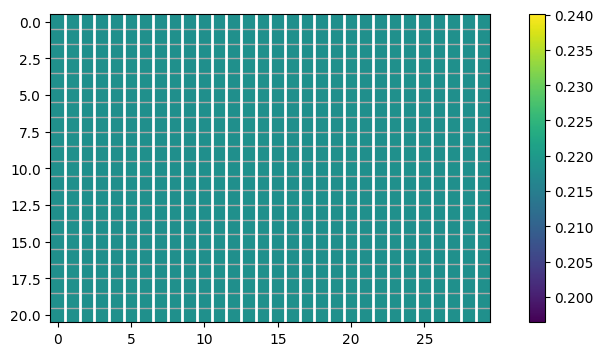

In [48]:
iter = 30
V0 = np.random.rand(dim)
V0 = V0/np.linalg.norm(V0)
sol = np.zeros((dim, iter))
sol[:, 0] = np.linalg.matrix_power(T,1000) @ V0 
sol[:, 0] = sol[:, 0]/np.linalg.norm(sol[:, 0])

for i in range(1, iter):
    V0 = np.random.rand(dim)
    V0 = V0/np.linalg.norm(V0)
    sol[:, i] = np.linalg.matrix_power(T,1000) @ V0
    sol[:, i] = sol[:, i]/np.linalg.norm(sol[:, i])

plt.figure(figsize=(10,4))
plt.imshow(sol)
plt.colorbar()
for i in range(sol.shape[0] - 1):
    plt.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=1)

for i in range(sol.shape[1] - 1):
    plt.axvline(x=i + 0.5, color='white', linestyle='-', linewidth=2)


In [49]:
def is_eigenvector(v, eigenvectors, tolerance=1e-6):
    v_norm = v / np.linalg.norm(v)  # Normalize the test vector

    for eigenvector in eigenvectors:
        eigenvector_norm = eigenvector / np.linalg.norm(eigenvector)  # Normalize the eigenvector

        # Check if the absolute value of the dot product is close to 1
        if np.abs(np.dot(v_norm, eigenvector_norm)) > 1 - tolerance:
            return True
    
    return False

In [50]:
print(is_eigenvector(sol[:,0], eigenvectors)) # See that the state vector converges towards 


True


The eigenvectors of $T$ provide insight into how changes in the network's state propagate. If $T$ has a dominant eigenvalue (say $\lambda_1$), whose magnitude is larger than that of other eigenvalues, and the corresponding eigenvector $u_1$, then as $n$ grows large, $T^n$ effectively becomes dominated by $\lambda_1^n$, aligning all resulting vectors along $u_1$:
$$
\lim_{n \to \infty} T^n \approx \lambda_1^n u_1 u_1^T
$$
This expression indicates that for large $n$, the transformation $T^n$ simplifies to the outer product of $u_1$ with itself, scaled by $\lambda_1^n$, which projects any vector it transforms into the direction defined by $u_1$.


data/raw/transformation_mat/disjointed.tex


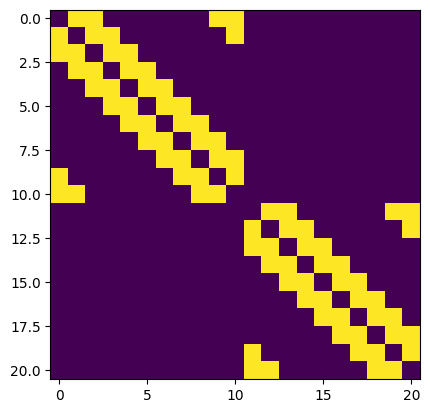

In [51]:
def fully_connected_adjacency(n):
    return np.ones((n, n)) - np.eye(n)

# Sub-network sizes
n1, n2 = 11, 10

# Create adjacency matrices for both sub-networks
A1 = transformation_matrix(n1)
A2 = transformation_matrix(n2)

# Combine into a single adjacency matrix for the entire system
A = np.block([
    [A1, np.zeros((n1, n2))],
    [np.zeros((n2, n1)), A2]
])
plt.imshow(A)

save_mat_to_latex(A,'disjointed.tex')

In [52]:
# Eigenvalues using linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors = eigenvectors.T

# Find the largest and smallest eigenvalues (ignore tiny imaginary parts due to computational issues)
sorted_indices = np.argsort(abs(eigenvalues))
largest_eigenvalue = eigenvalues[sorted_indices[-1]]
smallest_eigenvalue = eigenvalues[sorted_indices[0]]
largest_eigenvector = eigenvectors[:, sorted_indices[-1]]
smallest_eigenvector = eigenvectors[:, sorted_indices[0]]

print("\nVerification using np.linalg.eig:")
print("Largest Eigenvalues (1), (2):", eigenvalues[sorted_indices[-1]])
print()
print("Largest Eigenvector (1):", eigenvectors[:, sorted_indices[-1]])
print("Largest Eigenvector (2):", eigenvectors[:, sorted_indices[-2]],"\n\n")

print("\nVerification using np.linalg.eig:")
print("Smallest Eigenvalues (1):", eigenvalues[sorted_indices[1]])
print("Smallest Eigenvalues (2):", eigenvalues[sorted_indices[2]])
print()
print("Smallest Eigenvector (1):", eigenvectors[:, sorted_indices[1]])
print("Smallest Eigenvector (2):", eigenvectors[:, sorted_indices[2]])


Verification using np.linalg.eig:
Largest Eigenvalues (1), (2): 1.0000000000000009

Largest Eigenvector (1): [-0.30151134 -0.42640143  0.02479785 -0.42640143  0.00422679  0.42640143
  0.00729082  0.41503642 -0.02557686 -0.42640143  0.02560404  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Largest Eigenvector (2): [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.31622777
 -0.31622777 -0.21975425  0.20019004  0.4472136  -0.20733376  0.63245553
  0.02409836  0.13867367 -0.07210001] 



Verification using np.linalg.eig:
Smallest Eigenvalues (1): -0.059119720391658005
Smallest Eigenvalues (2): -0.059119720391658186

Smallest Eigenvector (1): [-0.30151134  0.06068325  0.41781784 -0.17713356 -0.38609346  0.35871171
 -0.22436289 -0.19788604  0.33842173  0.40912918 -0.14448129  0.
  0.          0.          0.          0.          0.          0.
  0.       

K for the disjointed matrix: 4.028967658534014e+17


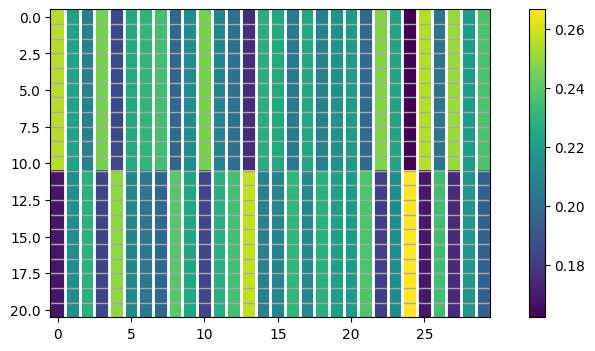

In [53]:
iter = 30
V0 = np.random.rand(dim)
V0 = V0/np.linalg.norm(V0)
sol = np.zeros((dim, iter))
sol[:, 0] = np.linalg.matrix_power(A,1000) @ V0 
sol[:, 0] = sol[:, 0]/np.linalg.norm(sol[:, 0])

for i in range(1, iter):
    V0 = np.random.rand(dim)
    V0 = V0/np.linalg.norm(V0)
    sol[:, i] = np.linalg.matrix_power(A,1000) @ V0
    sol[:, i] = sol[:, i]/np.linalg.norm(sol[:, i])

plt.figure(figsize=(10,4))
plt.imshow(sol)
plt.colorbar()
for i in range(sol.shape[0] - 1):
    plt.axhline(y=i + 0.5, color='darkgrey', linestyle='-', linewidth=1)

for i in range(sol.shape[1] - 1):
    plt.axvline(x=i + 0.5, color='white', linestyle='-', linewidth=2)

print('K for the disjointed matrix:', np.linalg.cond(A))

The system chooses one of the dominating eigenstates depending on the initial state.
$${\text {Relative error in output} \over \text {Relative error in input}} \leq K(\mathbf{A}) \rightarrow {\lVert \Delta x \rVert \over  {\lVert x \rVert}} \leq K(\mathbf{A}) {\lVert \Delta b \rVert \over {\lVert b \rVert}}$$  
High K number indicates ill conditioned matrix.
$$ K(\mathbf{A}) = {\lVert A^{-1} \rVert}\cdot {\lVert A \rVert}$$


In [54]:
import time
import timeit

In [55]:
def inv_solve(A,v):
    if (np.linalg.det(A)==0):
        return "Error" #return error if a matrix is not invertible 
    return np.linalg.inv(A) @ v


In [56]:
b = np.ones(dim)
for i in range(1,dim+1):
    b[i-1]/=i

print("Finding V(t-dt)\n")

%timeit sol1 = inv_solve(T,b)

print("Solution using matrix inversion (LU decomposition):\n",inv_solve(T,b),'\n')

%timeit sol_np = np.linalg.solve(T,b)
print("Solution using np.linalg.solve:\n",np.linalg.solve(T,b),'\n')

Finding V(t-dt)

150 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Solution using matrix inversion (LU decomposition):
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 

81.1 µs ± 491 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Solution using np.linalg.solve:
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 



In [57]:
def gauss_elim(A, b):
    # Create an augmented matrix [A | b]
    n = len(b)
    Ab = np.hstack([A, b.reshape(-1, 1)])
    
    # Gaussian elimination with pivoting
    for i in range(n):
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        Ab[[i, max_row]] = Ab[[max_row, i]]
        
        for j in range(i+1, n):
            ratio = Ab[j, i] / Ab[i, i]
            Ab[j, i:] -= ratio * Ab[i, i:]
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])) / Ab[i, i]
    
    return x

In [58]:
%timeit sol2 = gauss_elim(T,b)
print("Solution using Gaussian elimination:\n",gauss_elim(T,b),'\n')


721 µs ± 59.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Solution using Gaussian elimination:
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499] 



Classical iterative methods are problem because of 0 diagonals.

Use Krylov subspace GMRES

In [60]:
sparse_T = sp.sparse.csr_matrix(T)

# sparse matrix:
# 1.12 ms ± 48 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
#
# dense matrix:
# 994 µs ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
#
# Slightly faster for dense for some reason, sparcity < 90%
# sparcity of T = 82.3% -ish
 
%timeit sol3, exitCode = sp.sparse.linalg.gmres(T, b)
sol3, exitCode = sp.sparse.linalg.gmres(T, b)

# Check if the solution converged (exitCode should be 0)
if exitCode == 0:
    print("GMRES converged successfully.")
else:
    print("GMRES did not converge. Exit code:", exitCode)

print("Solution using sp.sparse.linalg.gmres:\n", sol3)

994 µs ± 30.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
GMRES converged successfully.
Solution using sp.sparse.linalg.gmres:
 [-4.39241309  4.89876229 -2.61858589  3.82519399 -2.99820986  1.71803346
 -2.12464156  1.9643241  -0.11271912  1.01932722 -0.41456532 -1.03703966
  0.49406792 -0.7654965   2.52479378 -1.69610776  2.234203   -3.74350028
  3.15010838 -3.46598139  5.18580499]
